In [963]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [964]:
def generate_gaussian(mean, cov, num_samples):
    """
    Generate multi-dimensional Gaussian random variables.

    Parameters:
        mean (list or np.array): Mean vector of the Gaussian distribution.
        cov (list or np.array): Covariance matrix of the Gaussian distribution.
        num_samples (int): Number of samples to generate.

    Returns:
        np.array: Generated samples of shape (num_samples, dimension).
    """
    mean = np.array(mean)
    cov = np.array(cov)

    if mean.ndim != 1 or cov.ndim != 2 or cov.shape[0] != cov.shape[1] or len(mean) != cov.shape[0]:
        raise ValueError("Mean vector and covariance matrix dimensions must align.")

    samples = np.random.multivariate_normal(mean, cov, num_samples)
    return samples

def generate_random_covariance(dim):
    """
    Generate a random positive semi-definite covariance matrix of given dimension.

    Parameters:
        dim (int): Dimension of the covariance matrix.

    Returns:
        np.array: A dim x dim covariance matrix.
    """
    A = np.random.rand(dim, dim)
    cov = np.dot(A, A.T)  # Create a symmetric positive semi-definite matrix
    return cov

def generate_combinations(numbers, r):
    """
    Generate all combinations of a given size from a list of numbers.

    Parameters:
        numbers (list): List of numbers to generate combinations from.
        r (int): Size of each combination.

    Returns:
        list: List of combinations, each as a tuple.
    """
    return list(combinations(numbers, r))

In [661]:
cov=generate_random_covariance(M)
cov=np.diag(cov)
np.diag(np.diag(x))

array([1.13826501, 2.93459981, 0.4223494 , 0.91175598, 3.092995  ,
       1.10864396])

In [966]:
class suboptimality:
    def __init__(self,M,K):
        self.M = M
        self.K = K
    # def generate_samples(self):
        # mean = [0]*self.M 
        mean = np.random.rand(M)
        cov=generate_random_covariance(self.M)
        # cov=np.diag(np.diag(cov))
        # cov=np.eye(M)
        num_samples = 1000
        # Generate samples
        self.samples = generate_gaussian(mean, cov, num_samples) #np.cov(samples.T)

    def iterative_elimination(self):
        A=[*range(self.M)]
        while len(A)>self.K:
            A,minexp=self.Aminus_enumeration(A)
        return A, minexp
    
    def iterative_addition(self):
        A=[] #[*range(self.M)]
        while len(A)<self.K:
            A,minexp=self.Aplus_enumeration(A)
        return A, minexp

    def Aminus_enumeration(self,A):
        comb=generate_combinations(A, len(A)-1)
        minexp=100
        optAminus=[]
        for c in comb:
            Aminus=list(c)
            exp=np.average(np.max(self.samples,1)-np.max(self.samples[:,Aminus],1))
            if minexp > exp:
                minexp = exp
                optAminus = Aminus   
        return optAminus, minexp
    
    def Aplus_enumeration(self,A):
        notA=[i for i in range(self.M) if i not in A]
        comb=[A+[i] for i in notA] #generate_combinations(notA, len(A)-1)
        minexp=100
        optAminus=[]
        for c in comb:
            Aminus=list(c)
            exp=np.average(np.max(self.samples,1)-np.max(self.samples[:,Aminus],1))
            if minexp > exp:
                minexp = exp
                optAminus = Aminus   
        return optAminus, minexp

    def enumeration(self):
        # Generate combinations
        numbers = [*range(self.M)]
        comb = generate_combinations(numbers, self.K)
        minexp=100
        optA=[]
        for c in comb:
            A=list(c)
            exp=np.average(np.max(self.samples,1)-np.max(self.samples[:,A],1))
            if minexp > exp:
                minexp = exp
                optA = A
        return optA, minexp

In [967]:
M=20
K=5
exp_eliminate=[]
exp_add=[]
exp_enumerate=[]
diff=0
for ignore in range(50):
    trial=suboptimality(M,K)
    result0=trial.iterative_elimination()
    # result1=trial.iterative_addition()
    result2=trial.enumeration()
    # if result0[0] != result1[0]:
    #     break
    #     diff+=1
    exp_eliminate += [result0[1]]
    # exp_add += [result1[1]]
    exp_enumerate += [result2[1]]

In [868]:
A=[0,2,3,4]
samples=trial.samples
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.9981892561659477

In [899]:
# trial=suboptimality(M,K)
trial.iterative_elimination()

([4, 10, 16], 1.0460216467706456)

In [894]:
trial.enumeration()

([6, 8, 17], 0.9883510864574083)

In [948]:
np.mean(exp_eliminate)

1.4603854348392944

In [949]:
np.mean(exp_enumerate)

1.4586218149850194

In [969]:
(np.mean(exp_eliminate)-np.mean(exp_enumerate))/np.mean(exp_enumerate)

0.0035738156278176704

In [970]:
np.max([exp_eliminate[i]-exp_enumerate[i] for i in range(50)])

0.019147688140062902

Text(0.5, 1.0, 'Expectation of sub-optimality gap | dependent actions | different mean over prior')

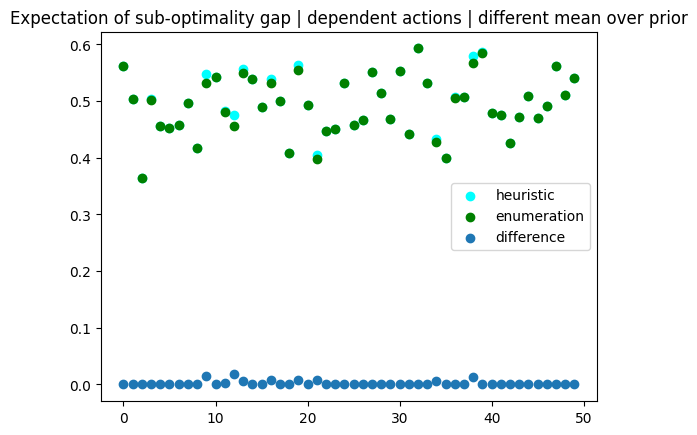

In [968]:
t=len(exp_enumerate)
plt.scatter([*range(t)],exp_eliminate,color='cyan',label='heuristic')
# plt.scatter([*range(t)],exp_add,color='b')
plt.scatter([*range(t)],exp_enumerate,color='green',label='enumeration')
plt.scatter([*range(t)],[exp_eliminate[i]-exp_enumerate[i] for i in range(t)],label='difference')
plt.legend()
plt.title('Expectation of sub-optimality gap | dependent actions | different mean over prior')

Text(0.5, 1.0, 'Expectation of sub-optimality gap | dependent actions')

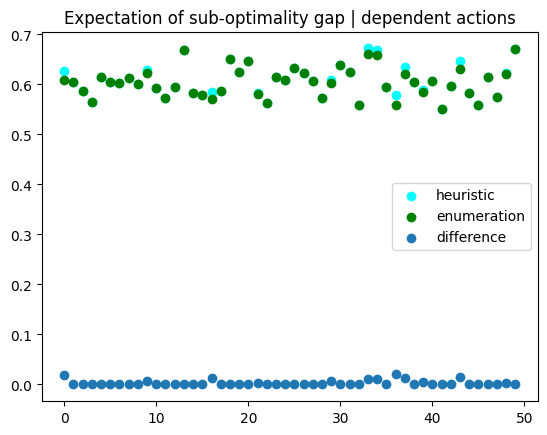

In [ ]:
t=len(exp_enumerate)
plt.scatter([*range(t)],exp_eliminate,color='cyan',label='heuristic')
# plt.scatter([*range(t)],exp_add,color='b')
plt.scatter([*range(t)],exp_enumerate,color='green',label='enumeration')
plt.scatter([*range(t)],[exp_eliminate[i]-exp_enumerate[i] for i in range(t)],label='difference')
plt.legend()
plt.title('Expectation of sub-optimality gap | dependent actions')

Text(0.5, 1.0, 'Expectation of sub-optimality gap | independent actions')

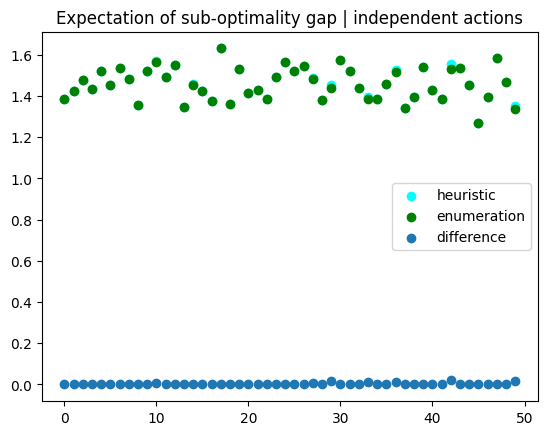

In [ ]:
t=len(exp_enumerate)
plt.scatter([*range(t)],exp_eliminate,color='cyan',label='heuristic')
# plt.scatter([*range(t)],exp_add,color='b')
plt.scatter([*range(t)],exp_enumerate,color='green',label='enumeration')
plt.scatter([*range(t)],[exp_eliminate[i]-exp_enumerate[i] for i in range(t)],label='difference')
plt.legend()
plt.title('Expectation of sub-optimality gap | independent actions')

In [839]:
trial.enumeration()

([1, 3, 5, 7, 8], 0.19981672153166596)

In [578]:
# Mean vector and covariance matrix

mean = [0]*M
cov=generate_random_covariance(M)
# cov=np.eye(M)
num_samples = 1000
# Generate samples
samples = generate_gaussian(mean, cov, num_samples) #np.cov(samples.T)

In [579]:
A=[*range(M)]
while len(A)>K:
    A,minexp=Aminus_enumeration(samples,A)
print(A,minexp)

[0, 1, 4] 0.10142462284716339


In [580]:
enumeration(samples)

([0, 1, 4], 0.10142462284716339)

In [546]:
A=[2,0]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.5183915607103443

In [451]:
A=[1,0]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.2005434133506281

In [452]:
A=[1,2]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.23886165038309223

In [266]:
A=[2,3]
np.average(np.max(samples,1)-np.max(samples[:,A],1))

0.8219816244864687

In [292]:
data

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 1, 1]])

In [293]:
data = np.array([[1,0,0],[0,1,0],[0,0,1],[1,1,1]])
np.cov(data)

array([[ 0.33333333, -0.16666667, -0.16666667,  0.        ],
       [-0.16666667,  0.33333333, -0.16666667,  0.        ],
       [-0.16666667, -0.16666667,  0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [58]:

B=[i for i in range(M) if i not in A]